In [1]:
!pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8504 sha256=9edb11ea874e516e965afb44edbef6c0d3f5bf4c5fd128c9c54d71596e834e28
  Stored in directory: c:\users\anshu\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


In [1]:
import yfinance as yf


In [2]:
def save_stock_data(ticker, save_file_name=None):
  try:
    msft = yf.Ticker(ticker)
    raw_data = msft.history(period="max")
    if save_file_name==None:
      raw_data.to_csv(ticker + "_past_data.csv")
      return 0
    else:
      raw_data.to_csv(save_file_name)
      return 0
  except:
    return 1

In [3]:
save_stock_data("AAPL")

0

# Adding Target Label

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("AAPL_past_data.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,0.0,0.0
1,1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0
2,1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0
3,1980-12-17,0.090160,0.090596,0.090160,0.090160,86441600,0.0,0.0
4,1980-12-18,0.092774,0.093210,0.092774,0.092774,73449600,0.0,0.0


In [6]:
 df["Movement"] = df['Close'] - df['Close'].shift(1)
 df = df[1:]
 df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Movement
1,1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0,-0.005226
2,1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0,-0.006969
3,1980-12-17,0.090160,0.090596,0.090160,0.090160,86441600,0.0,0.0,0.002178
4,1980-12-18,0.092774,0.093210,0.092774,0.092774,73449600,0.0,0.0,0.002614
5,1980-12-19,0.098436,0.098872,0.098436,0.098436,48630400,0.0,0.0,0.005662


In [7]:
def numerical_to_category(number):
  if number<0:
    return 0
  return 1

In [8]:
df["Movement"] = df["Movement"].apply(numerical_to_category)

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Movement
1,1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0,0
2,1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0,0
3,1980-12-17,0.090160,0.090596,0.090160,0.090160,86441600,0.0,0.0,1
4,1980-12-18,0.092774,0.093210,0.092774,0.092774,73449600,0.0,0.0,1
5,1980-12-19,0.098436,0.098872,0.098436,0.098436,48630400,0.0,0.0,1


In [10]:
df["Movement"].value_counts()

1    5566
0    4903
Name: Movement, dtype: int64

In [11]:
df.to_csv("AAPL_past_data.csv")

# Importing Libraries


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

# Data Cleaning



In [14]:
df = pd.read_csv('AAPL_past_data.csv')

In [15]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,0.0,0.0
1,1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0
2,1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0
3,1980-12-17,0.090160,0.090596,0.090160,0.090160,86441600,0.0,0.0
4,1980-12-18,0.092774,0.093210,0.092774,0.092774,73449600,0.0,0.0


<AxesSubplot:>

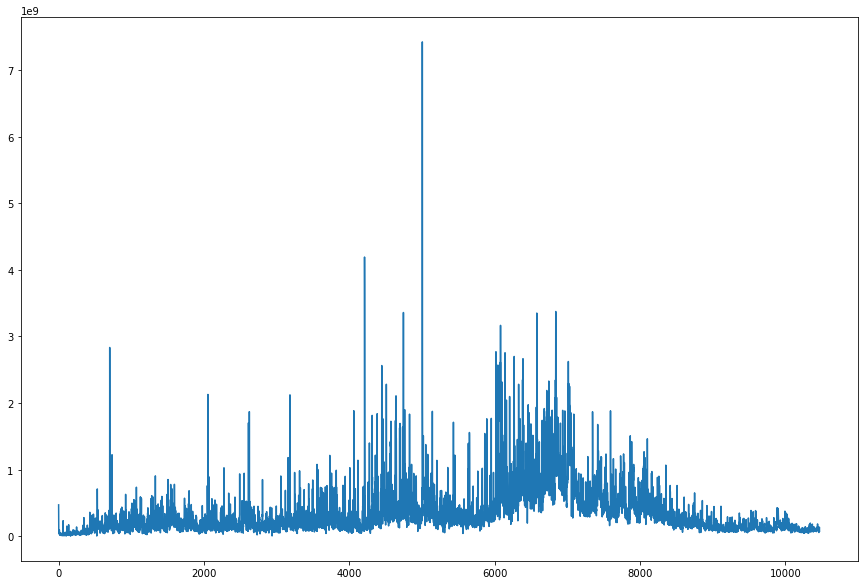

In [16]:
plt.figure(figsize=(15,10))
df['Volume'].plot()

In [17]:
df['Volume'].value_counts()

246400000    7
239680000    6
244160000    6
255360000    5
302400000    5
            ..
244652800    1
209171200    1
119470400    1
149150400    1
73237900     1
Name: Volume, Length: 9907, dtype: int64

In [18]:
df['Dividends'].value_counts()

0.000000    10395
0.001071       21
0.130000        4
0.220000        4
0.205000        4
0.192500        4
0.182500        4
0.157500        4
0.142500        4
0.117500        4
0.108929        4
0.000982        4
0.000893        4
0.000714        4
0.094643        3
0.000536        2
0.230000        1
Name: Dividends, dtype: int64

In [19]:
df['Stock Splits'].value_counts()

0.0    10465
2.0        3
7.0        1
4.0        1
Name: Stock Splits, dtype: int64

In [20]:
# dropping 'Dividends' and 'Stock Splits' attribute as they have constant value of 0's which are of no use
df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [21]:
df

,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600
1,1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800
2,1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000
3,1980-12-17,0.090160,0.090596,0.090160,0.090160,86441600
4,1980-12-18,0.092774,0.093210,0.092774,0.092774,73449600
...,...,...,...,...,...,...
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,108123900
10467,2022-06-17,130.070007,133.080002,129.809998,131.559998,134118500
10468,2022-06-21,133.419998,137.059998,133.320007,135.869995,81000500


In [22]:
df.isna().sum() # no null values

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10470 entries, 0 to 10469
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10470 non-null  object 
 1   Open    10470 non-null  float64
 2   High    10470 non-null  float64
 3   Low     10470 non-null  float64
 4   Close   10470 non-null  float64
 5   Volume  10470 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 490.9+ KB


In [24]:
df.describe()

,Open,High,Low,Close,Volume
count,10470.000000,10470.000000,10470.000000,10470.000000,1.047000e+04
mean,14.147726,14.305250,13.991229,14.153636,3.308004e+08
std,31.662384,32.037141,31.294634,31.678773,3.388276e+08
min,0.038765,0.038765,0.038329,0.038329,0.000000e+00
25%,0.235617,0.240905,0.230030,0.235471,1.237336e+08
50%,0.392065,0.398738,0.384646,0.392373,2.181508e+08
75%,12.863365,12.957567,12.722852,12.860231,4.105332e+08
max,182.130025,182.439174,178.629624,181.511703,7.421641e+09


In [25]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [26]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [27]:
df.corr()

,Open,High,Low,Close,Volume,Year,Month,Day
Open,1.000000,0.999944,0.999925,0.999851,-0.199339,0.630884,-0.006505,-0.003753
High,0.999944,1.000000,0.999910,0.999925,-0.198799,0.630480,-0.006709,-0.003649
Low,0.999925,0.999910,1.000000,0.999929,-0.200205,0.631292,-0.006272,-0.003592
Close,0.999851,0.999925,0.999929,1.000000,-0.199520,0.630877,-0.006463,-0.003648
Volume,-0.199339,-0.198799,-0.200205,-0.199520,1.000000,0.167200,-0.051808,-0.010896
Year,0.630884,0.630480,0.631292,0.630877,0.167200,1.000000,-0.019196,-0.003500
Month,-0.006505,-0.006709,-0.006272,-0.006463,-0.051808,-0.019196,1.000000,0.000831
Day,-0.003753,-0.003649,-0.003592,-0.003648,-0.010896,-0.003500,0.000831,1.000000


In [28]:
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,1980,12,12
1,1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,1980,12,15
2,1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,1980,12,16
3,1980-12-17,0.090160,0.090596,0.090160,0.090160,86441600,1980,12,17
4,1980-12-18,0.092774,0.093210,0.092774,0.092774,73449600,1980,12,18


Text(0.5, 1.0, 'HEATMAP')

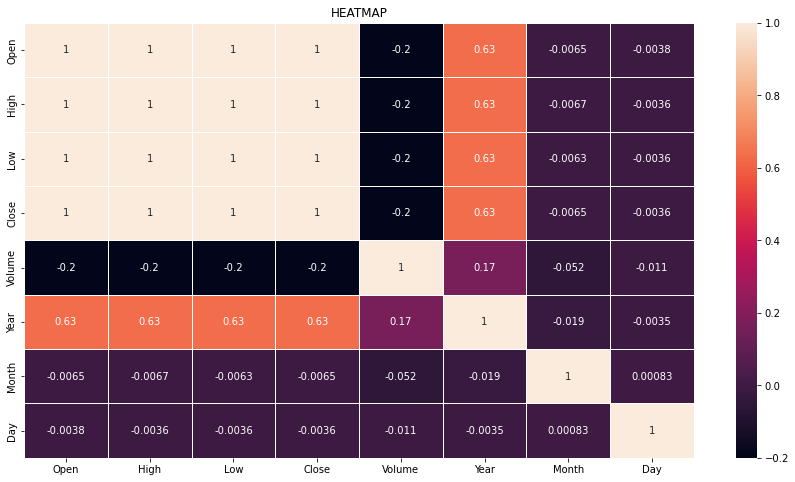

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidth=1)
plt.title('HEATMAP')